# Manage Land Surface Model coordinates

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
xr.set_options(display_style='html')
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [51]:
fn='data/surfdata_1.9x2.5_hist_16pfts_Irrig_CMIP6_simyr2000_c190304.nc'
ds_l = xr.open_dataset(fn)
ds_l

<xarray.Dataset>
Dimensions:                  (cft: 2, lsmlat: 96, lsmlon: 144, lsmpft: 17, natpft: 15, nglcec: 10, nglcecp1: 11, nlevsoi: 10, nlevurb: 5, numrad: 2, numurbl: 3, time: 12)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, lsmpft, nglcec, nglcecp1, nlevsoi, nlevurb, numrad, numurbl
Data variables:
    mxsoil_color             int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 ...
    LANDFRAC_PFT             (lsmlat, lsmlon) float64 ...
    PFTDATA_MASK             (lsmlat, lsmlon) int32 ...
    PCT_NATVEG               (lsmlat, lsmlon) float64 ...
    PCT_CROP                 (lsmlat, lsmlon) float64 ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 ...
    AREA                     (lsmlat, lsmlon) float64 ...
    LONGXY                   (lsmlat, lsmlon) float64 ...
    LATIXY                   (lsmlat, lsmlon) float64 ...
    EF1_BTR                  (lsmlat, lsmlon) float64 ...
    EF1_FET                  (lsmlat, lsmlon) float64 ...
    EF1_FDT                  (lsmlat, lsmlon) float64 ...
    EF1_SHR                  (lsmlat, lsmlon) float64 ...
    EF1_GRS                  (lsmlat, lsmlon) float64 ...
    EF1_CRP                  (lsmlat, lsmlon) float64 ...
    CANYON_HWR               (numurbl, lsmlat, lsmlon) float64 ...
    EM_IMPROAD               (numurbl, lsmlat, lsmlon) float64 ...
    EM_PERROAD               (numurbl, lsmlat, lsmlon) float64 ...
    EM_ROOF                  (numurbl, lsmlat, lsmlon) float64 ...
    EM_WALL                  (numurbl, lsmlat, lsmlon) float64 ...
    HT_ROOF                  (numurbl, lsmlat, lsmlon) float64 ...
    THICK_ROOF               (numurbl, lsmlat, lsmlon) float64 ...
    THICK_WALL               (numurbl, lsmlat, lsmlon) float64 ...
    T_BUILDING_MIN           (numurbl, lsmlat, lsmlon) float64 ...
    WIND_HGT_CANYON          (numurbl, lsmlat, lsmlon) float64 ...
    WTLUNIT_ROOF             (numurbl, lsmlat, lsmlon) float64 ...
    WTROAD_PERV              (numurbl, lsmlat, lsmlon) float64 ...
    ALB_IMPROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_IMPROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_PERROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_PERROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_ROOF_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_ROOF_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_WALL_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_WALL_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    TK_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    TK_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    TK_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    NLEV_IMPROAD             (numurbl, lsmlat, lsmlon) int32 ...
    peatf                    (ls

In [52]:
ds_l['LONGXY']

<xarray.DataArray 'LONGXY' (lsmlat: 96, lsmlon: 144)>
array([[  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       ...,
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5]])
Dimensions without coordinates: lsmlat, lsmlon
Attributes:
    long_name:  longitude
    units:      degrees east

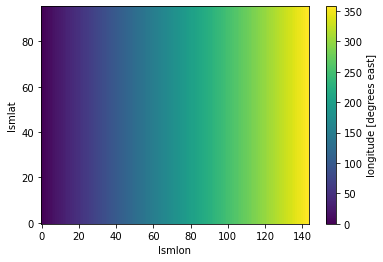

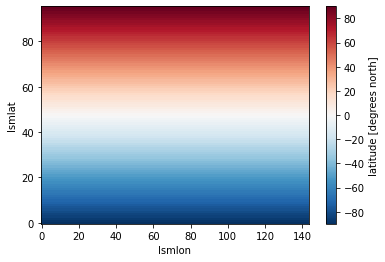

In [13]:
ds_l['LONGXY'].plot()
plt.show()
ds_l['LATIXY'].plot()
plt.show()

In [14]:
ds_l['lsmlat'] = ds_l['LATIXY'].isel(lsmlon=0)
ds_l['lsmlon'] = ds_l['LONGXY'].isel(lsmlat=0)
ds_l

<xarray.Dataset>
Dimensions:                  (cft: 2, lsmlat: 96, lsmlon: 144, lsmpft: 17, natpft: 15, nglcec: 10, nglcecp1: 11, nlevsoi: 10, nlevurb: 5, numrad: 2, numurbl: 3, time: 12)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * lsmlat                   (lsmlat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lsmlon                   (lsmlon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
Dimensions without coordinates: lsmpft, nglcec, nglcecp1, nlevsoi, nlevurb, numrad, numurbl
Data variables:
    mxsoil_color             int32 20
    SOIL_COLOR               (lsmlat, lsmlon) int32 10 10 10 10 ... 15 15 15 15
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 0.3902 0.3902 ... 0.3658
    LANDFRAC_PFT             (lsmlat, lsmlon) float64 1.0 1.0 1.0 ... 0.0 0.0
    PFTDATA_MASK             (lsmlat, lsmlon) int32 1 1 1 1 1 1 ... 0 0 0 0 0 0
    PCT_NATVEG               (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    PCT_CROP                 (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 100.0 100.0 ... 0.0
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 ...
    AREA                     (lsmlat, lsmlon) float64 242.0 242.0 ... 242.0
    LONGXY                   (lsmlat, lsmlon) float64 0.0 2.5 ... 355.0 357.5
    LATIXY                   (lsmlat, lsmlon) float64 -90.0 -90.0 ... 90.0 90.0
    EF1_BTR                  (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    EF1_FET                  (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    EF1_FDT                  (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    EF1_SHR                  (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    EF1_GRS                  (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    EF1_CRP                  (lsmlat, lsmlon) float64 0.0 0.0 0.0 ... 0.0 0.0
    CANYON_HWR               (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    EM_IMPROAD               (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    EM_PERROAD               (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    EM_ROOF                  (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    EM_WALL                  (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    HT_ROOF                  (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    THICK_ROOF               (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    THICK_WALL               (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    T_BUILDING_MIN           (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    WIND_HGT_CANYON          (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    WTLUNIT_ROOF             (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    WTROAD_PERV              (numurbl, lsmlat, lsmlon) float64 0.0 0.0 ... 0.0
    ALB_IMPROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 0.0 .....
    ALB_IMPROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 0.0 .....
    ALB_PERROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 0.0 .....
    ALB_PERROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 0.0 .....
    ALB_ROOF_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 0.0 .....
    ALB_ROOF_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 0.0 .....
    ALB_WALL_DIR             (numrad, numurbl, lsmlat,